# Agency vs Communion - corellation analysis (English)

In [1]:
# general
import pandas as pd
import numpy as np
import scipy.stats
import codecs
from matplotlib import pyplot as plt
from numpy import linalg as LA

# bolukbasi's
import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding

# mine
import db_functions as db

### Step 1: Load embeddings

We load all the emdeddings using the same methods and applying the same preprocessing in order to have a common start.

In [2]:
# load FastText's emdeddings
E_ft =  WordEmbedding('../embedding/fast-text/cc.en.300.reduced.vec', 'ft')

*** Reading data from ../embedding/fast-text/cc.en.300.reduced.vec
(143, 300)
143 words of dimension 300 : he, his, her, she, ..., broadminded, hardhearted, achievement-oriented, comunicative
143 words of dimension 300 : he, his, her, she, ..., broadminded, hardhearted, achievement-oriented, comunicative


### Step 2: working whit FastText's embeddings

### Step 2.1: vector difference

In [3]:
# gender direction
g_diff = E_ft.diff('he', 'she')

#### Step 2.2: PCA

In [4]:
# list of pairs to define gender
gender_pairs = [['he','she'],
                ['his','her'],
                ['man','woman'],
                ['john','mary'],
                ['himself','herself'],
                ['son','daughter'],
                ['father','mother'],
                ['guy','gal'],
                ['boy','girl'],
                ['male','female']]

In [5]:
# PCA
pca = we.doPCA(gender_pairs, E_ft)

# PCA components
pc = pca.components_

# singular values
sv = pca.singular_values_

In [6]:
print("Singular values:")
print(sv)

Singular values:
[1.2744704  0.60642874 0.56670284 0.3623385  0.30372494 0.27129108
 0.2500329  0.23400122 0.18252374 0.15088211]


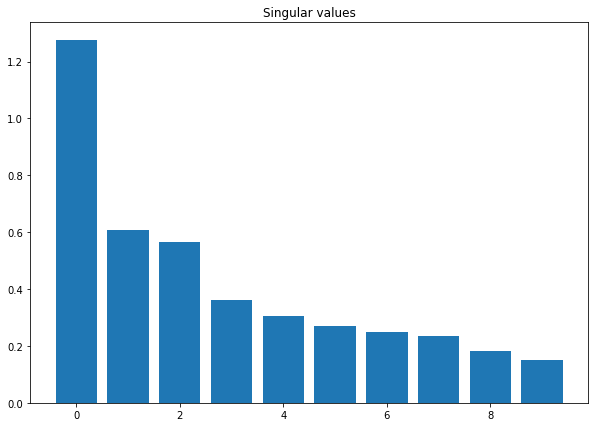

In [13]:
#fig = plt.figure(figsize=(10,7))    
plt.bar(range(pca.n_components_), sv)
plt.title("Singular values")
plt.show()
#fig.savefig('pca.png')

In [23]:
# gender direction
g_pca_0  = pc[0]/LA.norm(pc[0])

#### Step 2.3: Compute projections

##### All words

In [24]:
import importlib
importlib.reload(db)

<module 'db_functions' from '/Users/davidebiasion/Documents/tesi/prova dati/agency-communion/db_functions.py'>

In [25]:
# words
ag_com = db.read('ag_com_en_usa_scores.txt', 'ag-com-en')

In [26]:
# compute projections
proj_ag_com_g_diff =  db.prof_proj(E_ft, ag_com, g_diff, 'ag-com-en')
proj_ag_com_g_pca_0 =  db.prof_proj(E_ft, ag_com, g_pca_0, 'ag-com-en')

In [27]:
# print ag_com results
ag_com_col0 = [] # pandas columns
ag_com_col1 = []
ag_com_col2 = []
ag_com_col3 = []
ag_com_col4 = []

for i in range(len(proj_ag_com_g_diff)):
    ag_com_col0.append(proj_ag_com_g_diff[i][0]) # word
    ag_com_col1.append(proj_ag_com_g_diff[i][1]) # projection on g_diff
    ag_com_col2.append(proj_ag_com_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_col3.append(proj_ag_com_g_diff[i][2])
    ag_com_col4.append(proj_ag_com_g_diff[i][3])

ag_com_data = {'Word':ag_com_col0, 
               'Proj g_diff':ag_com_col1,
               'Proj g_pca_0':ag_com_col2, 
               'Agency':ag_com_col3,
               'Communion':ag_com_col4}

ag_com_table = pd.DataFrame(ag_com_data)
ag_com_table

,Word,Proj g_diff,Proj g_pca_0,Agency,Communion
0,able,-0.052593,0.001681,2.10,1.17
1,achievement-oriented,-0.010754,-0.040827,2.76,0.56
2,active,-0.015718,0.002589,2.29,1.41
3,affectionate,-0.011161,0.000701,-0.34,2.32
4,altruistic,-0.009342,0.031733,-0.29,1.27
5,ambitious,0.023273,0.034574,2.76,0.48
6,assertive,-0.106880,-0.124429,2.73,0.32
7,boastful,0.110857,0.128795,1.31,-1.21
8,broadminded,-0.011295,-0.027428,0.95,1.98
9,capable,-0.011414,0.052533,2.26,1.24


In [28]:
# ag_com correlation
# agency correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col3, ag_com_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col3, ag_com_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col3, ag_com_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col3, ag_com_col2)[1]

In [29]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency correlation")
pearson_table

Agency correlation


,g_diff,g_pca_0
r,0.120390,0.000361
p,0.331833,0.997689


In [30]:
# communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col4, ag_com_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col4, ag_com_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_col4, ag_com_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_col4, ag_com_col2)[1]

In [32]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion correlation")
pearson_table

Communion correlation


,g_diff,g_pca_0
r,-0.200768,-0.020456
p,0.103299,0.869488


In [33]:
# agency-communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(np.array(ag_com_col3)-np.array(ag_com_col4), ag_com_col2)[1]

In [34]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency-Communion correlation")
pearson_table

Agency-Communion correlation


,g_diff,g_pca_0
r,0.208170,0.013556
p,0.090941,0.913302


##### Ungendered words

In [41]:
# words
ag_com_ung = db.read('ag_com_ung_en_usa_scores.txt', 'ag-com-en')

In [42]:
# compute projections
proj_ag_com_ung_g_diff =  db.prof_proj(E_ft, ag_com_ung, g_diff, 'ag-com-en')
proj_ag_com_ung_g_pca_0 =  db.prof_proj(E_ft, ag_com_ung, g_pca_0, 'ag-com-en')

In [43]:
# print ag_com_ung results
ag_com_ung_col0 = [] # pandas columns
ag_com_ung_col1 = []
ag_com_ung_col2 = []
ag_com_ung_col3 = []
ag_com_ung_col4 = []

for i in range(len(proj_ag_com_ung_g_diff)):
    ag_com_ung_col0.append(proj_ag_com_ung_g_diff[i][0]) # word
    ag_com_ung_col1.append(proj_ag_com_ung_g_diff[i][1]) # projection on g_diff
    ag_com_ung_col2.append(proj_ag_com_ung_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_ung_col3.append(proj_ag_com_ung_g_diff[i][2])
    ag_com_ung_col4.append(proj_ag_com_ung_g_diff[i][3])

ag_com_ung_data = {'Word':ag_com_ung_col0, 
               'Proj g_diff':ag_com_ung_col1,
               'Proj g_pca_0':ag_com_ung_col2,
               'Agency':ag_com_ung_col3,
               'Communion':ag_com_ung_col4}

ag_com_ung_table = pd.DataFrame(ag_com_ung_data)
ag_com_ung_table

,Word,Proj g_diff,Proj g_pca_0,Agency,Communion
0,able,-0.052593,0.001681,2.10,1.17
1,altruistic,-0.009342,0.031733,-0.29,1.27
2,capable,-0.011414,0.052533,2.26,1.24
3,competent,0.004917,0.044440,1.98,1.12
4,consistent,0.030587,0.080278,1.55,1.21
5,dominant,-0.024799,0.035461,2.64,-1.31
6,friendly,0.000613,0.020576,0.05,2.59
7,helpful,-0.056511,-0.040804,-0.10,2.69
8,egoistic,0.076131,0.083177,1.56,-1.83
9,independent,-0.092237,-0.086124,2.90,-1.07


In [44]:
# ag_com_ung correlation
# agency correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col3, ag_com_ung_col2)[1]

In [45]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency ungendered correlation")
pearson_table

Agency ungendered correlation


,g_diff,g_pca_0
r,0.145584,0.195729
p,0.528912,0.395163


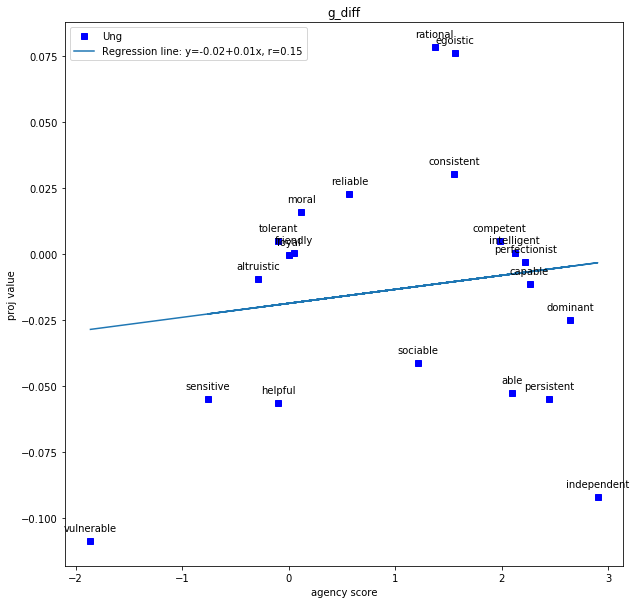

In [46]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col3, ag_com_ung_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col3, ag_com_ung_col1, linewidth=0, marker='s', color='blue', label='Ung')
ax.plot(np.array(ag_com_ung_col3), intercept + slope * np.array(ag_com_ung_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col3[i], ag_com_ung_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/ag/ft_g_diff')

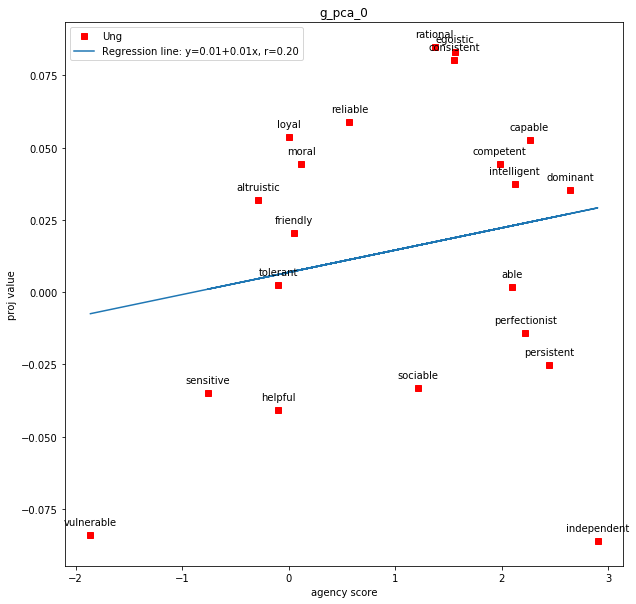

In [47]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col3, ag_com_ung_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col3, ag_com_ung_col2, linewidth=0, marker='s', color='red', label='Ung')
ax.plot(np.array(ag_com_ung_col3), intercept + slope * np.array(ag_com_ung_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col3[i], ag_com_ung_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/ag/ft_g_pca_0')

In [49]:
# communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_ung_col4, ag_com_ung_col2)[1]

In [50]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion ungendered correlation")
pearson_table

Communion ungendered correlation


,g_diff,g_pca_0
r,0.070686,0.103907
p,0.760769,0.653993


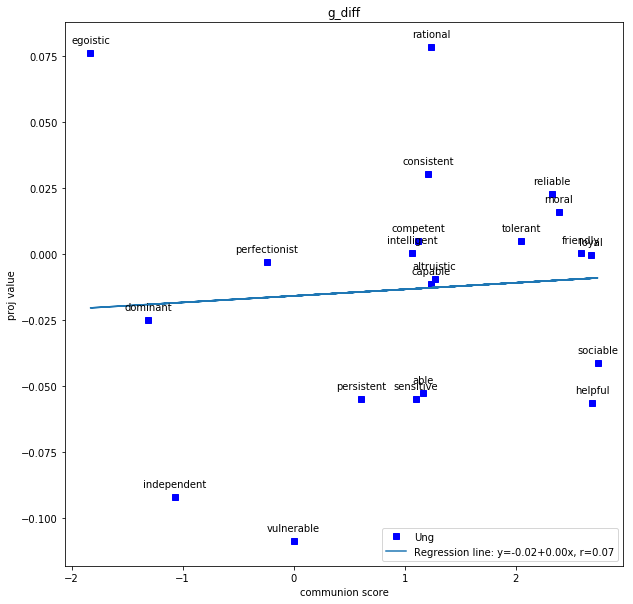

In [51]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col4, ag_com_ung_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col4, ag_com_ung_col1, linewidth=0, marker='s', color='blue', label='Ung')
ax.plot(np.array(ag_com_ung_col4), intercept + slope * np.array(ag_com_ung_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col4[i], ag_com_ung_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/com/ft_g_diff')

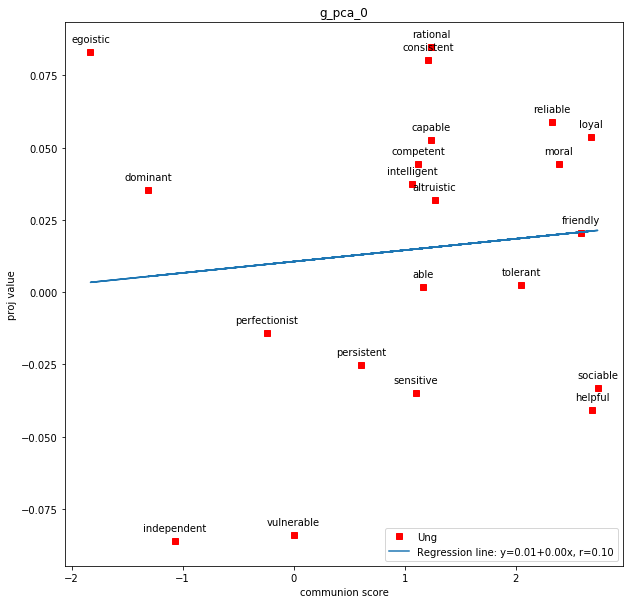

In [52]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_ung_col4, ag_com_ung_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_ung_col4, ag_com_ung_col2, linewidth=0, marker='s', color='red', label='Ung')
ax.plot(np.array(ag_com_ung_col4), intercept + slope * np.array(ag_com_ung_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_ung_col0):
    plt.annotate(label, # this is the text
                 (ag_com_ung_col4[i], ag_com_ung_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/ung/com/ft_g_pca_0')

In [54]:
# agency-communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[0]
r_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[1]
p_ag_com_g_diff = scipy.stats.pearsonr(np.array(ag_com_ung_col3)-np.array(ag_com_ung_col4), ag_com_ung_col1)[1]

In [55]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency-Communion ungendered correlation")
pearson_table

Agency-Communion ungendered correlation


,g_diff,g_pca_0
r,0.041598,0.050623
p,0.857915,0.653993


##### Gendered words

In [56]:
# words
ag_com_gen = db.read('ag_com_gen_en_usa_scores.txt', 'ag-com-en')

In [57]:
# compute projections
proj_ag_com_gen_g_diff =  db.prof_proj(E_ft, ag_com_gen, g_diff, 'ag-com-en')
proj_ag_com_gen_g_pca_0 =  db.prof_proj(E_ft, ag_com_gen, g_pca_0, 'ag-com-en')

In [58]:
# print ag_com_gen results
ag_com_gen_col0 = [] # pandas columns
ag_com_gen_col1 = []
ag_com_gen_col2 = []
ag_com_gen_col3 = []
ag_com_gen_col4 = []

for i in range(len(proj_ag_com_gen_g_diff)):
    ag_com_gen_col0.append(proj_ag_com_gen_g_diff[i][0]) # word
    ag_com_gen_col1.append(proj_ag_com_gen_g_diff[i][1]) # projection on g_diff
    ag_com_gen_col2.append(proj_ag_com_gen_g_pca_0[i][1]) # projection on g_pca_0
    ag_com_gen_col3.append(proj_ag_com_gen_g_diff[i][2])
    ag_com_gen_col4.append(proj_ag_com_gen_g_diff[i][3])

ag_com_gen_data = {'Word':ag_com_gen_col0, 
               'Proj g_diff':ag_com_gen_col1,
               'Proj g_pca_0':ag_com_gen_col2,
               'Agency':ag_com_gen_col3,
               'Communion':ag_com_gen_col4}

ag_com_gen_table = pd.DataFrame(ag_com_gen_data)
ag_com_gen_table

,Word,Proj g_diff,Proj g_pca_0,Agency,Communion
0,achievement-oriented,-0.010754,-0.040827,2.76,0.56
1,active,-0.015718,0.002589,2.29,1.41
2,affectionate,-0.011161,0.000701,-0.34,2.32
3,ambitious,0.023273,0.034574,2.76,0.48
4,assertive,-0.106880,-0.124429,2.73,0.32
5,boastful,0.110857,0.128795,1.31,-1.21
6,broadminded,-0.011295,-0.027428,0.95,1.98
7,caring,-0.146734,-0.085706,-0.27,2.59
8,chaotic,0.002007,0.017290,-0.12,-1.00
9,comunicative,0.024220,-0.005899,1.37,2.51


In [59]:
# ag_com_gen correlation
# agency correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col3, ag_com_gen_col2)[1]

In [60]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Agency gendered correlation")
pearson_table

Agency gendered correlation


,g_diff,g_pca_0
r,0.104413,-0.091148
p,0.489840,0.546884


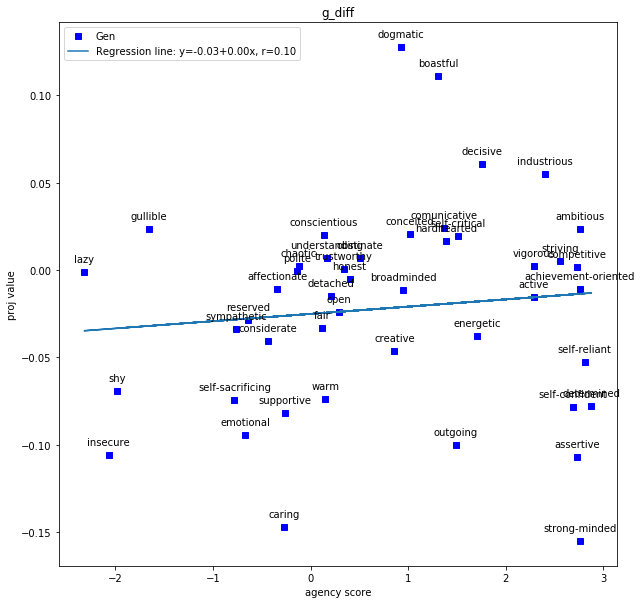

In [61]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col3, ag_com_gen_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col3, ag_com_gen_col1, linewidth=0, marker='s', color='blue', label='Gen')
ax.plot(np.array(ag_com_gen_col3), intercept + slope * np.array(ag_com_gen_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col3[i], ag_com_gen_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/ag/ft_g_diff')

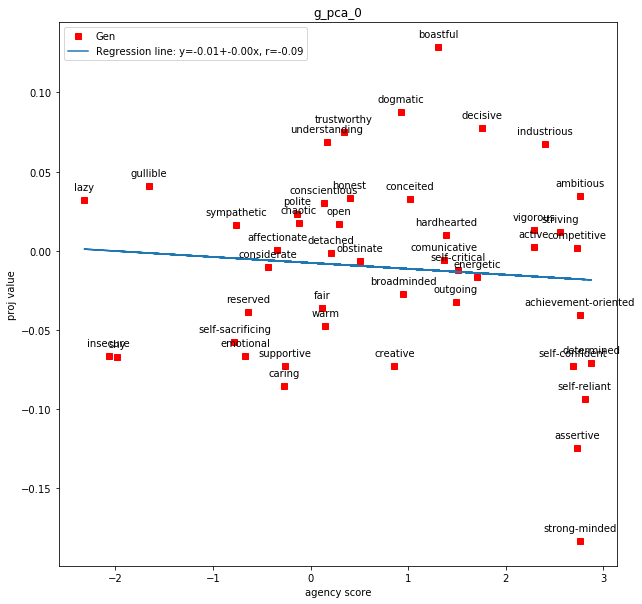

In [62]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col3, ag_com_gen_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col3, ag_com_gen_col2, linewidth=0, marker='s', color='red', label='Gen')
ax.plot(np.array(ag_com_gen_col3), intercept + slope * np.array(ag_com_gen_col3), label=line)
ax.set_xlabel('agency score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col3[i], ag_com_gen_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/ag/ft_g_pca_0')

In [64]:
# communion correlation
r_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col1)[0]
r_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col2)[0]
p_ag_com_g_diff = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col1)[1]
p_ag_com_g_pca_0 = scipy.stats.pearsonr(ag_com_gen_col4, ag_com_gen_col2)[1]

In [65]:
pearson_data = {'g_diff':[r_ag_com_g_diff,p_ag_com_g_diff],
                'g_pca_0':[r_ag_com_g_pca_0,p_ag_com_g_pca_0]}
pearson_table = pd.DataFrame(pearson_data, index=['r','p'])
print("Communion gendered correlation")
pearson_table

Communion gendered correlation


,g_diff,g_pca_0
r,-0.310013,-0.103374
p,0.036020,0.494194


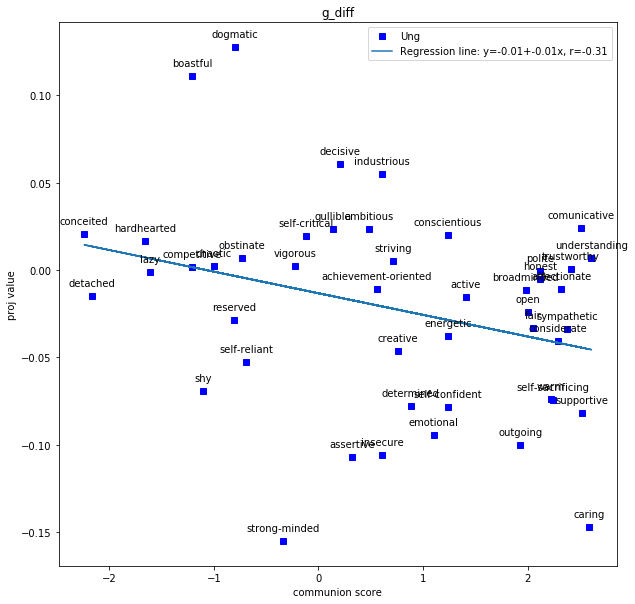

In [66]:
# correlation plot g_diff
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col4, ag_com_gen_col1)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col4, ag_com_gen_col1, linewidth=0, marker='s', color='blue', label='Ung')
ax.plot(np.array(ag_com_gen_col4), intercept + slope * np.array(ag_com_gen_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_diff")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col4[i], ag_com_gen_col1[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/com/ft_g_diff')

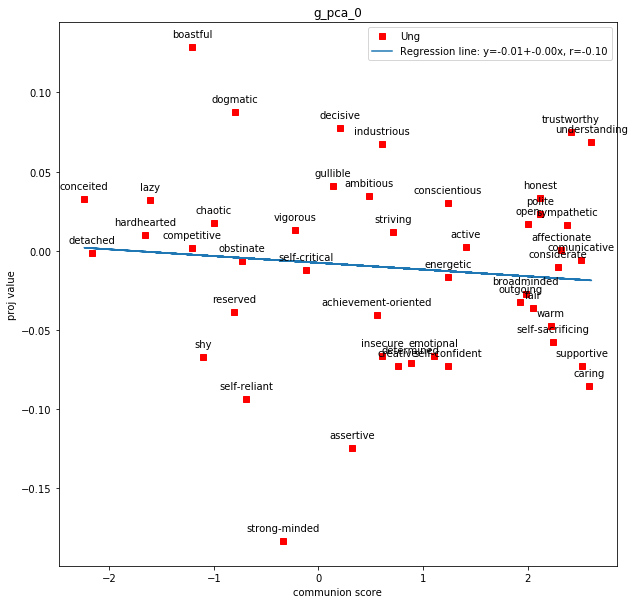

In [67]:
# correlation plot g_pca_0
slope, intercept, r, p, stderr = scipy.stats.linregress(ag_com_gen_col4, ag_com_gen_col2)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig = plt.figure(figsize=(10,10))    
ax = fig.add_subplot(111)
ax.plot(ag_com_gen_col4, ag_com_gen_col2, linewidth=0, marker='s', color='red', label='Ung')
ax.plot(np.array(ag_com_gen_col4), intercept + slope * np.array(ag_com_gen_col4), label=line)
ax.set_xlabel('communion score')
ax.set_ylabel('proj value')
ax.set_title("g_pca_0")
ax.legend(facecolor='white')

for i, label in enumerate(ag_com_gen_col0):
    plt.annotate(label, # this is the text
                 (ag_com_gen_col4[i], ag_com_gen_col2[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()
#fig.savefig('corr-plot/gen/com/ft_g_pca_0'